In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

C:\Users\JAKE\AppData\Local\Temp/ipykernel_23076/3262108759.py:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  img = mpimg.imread(url)


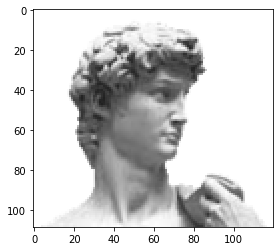

In [30]:
url = 'https://github.com/dknife/ML/raw/main/data/image/david.png'
img = mpimg.imread(url)

plt.imshow(img)  # 아래는 david.png 뿐 아니라 book.png도 로드한 결과임

In [31]:
img.shape

(109, 120, 4)

C:\Users\JAKE\AppData\Local\Temp/ipykernel_23076/3637584470.py:3: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  img = mpimg.imread(url)


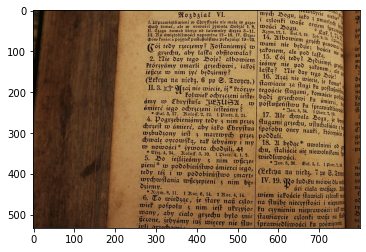

In [32]:
# 책에는 아래 URL이 없으나 그림은 나타나 있음
url = 'https://github.com/dknife/ML/raw/main/data/image/book.png'
img = mpimg.imread(url)

plt.imshow(img)  # 아래는 david.png 뿐 아니라 book.png도 로드한 결과임

In [33]:
# 다비드 그림을 사용
url = 'https://github.com/dknife/ML/raw/main/data/image/david.png'
img = mpimg.imread(url)

def padding(image, p_size):     # numpy의 pad 함수를 이용한 패딩 구현
    padded_img = np.pad(
        array = image,
        pad_width = ((p_size, p_size), (p_size, p_size), (0, 0)),
        mode = 'constant', constant_values = 0)
    return padded_img

C:\Users\JAKE\AppData\Local\Temp/ipykernel_23076/4115919940.py:3: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  img = mpimg.imread(url)


(113, 124, 4)

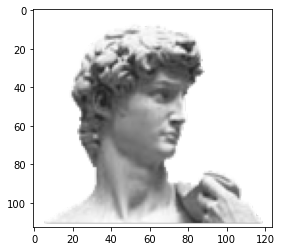

In [34]:
padded = padding(img, 2)
plt.imshow(padded)
padded.shape

In [35]:
box_filter = np.array(
    [[1/9, 1/9, 1/9],
     [1/9, 1/9, 1/9],
     [1/9, 1/9, 1/9]])

In [36]:
def apply_filter(small_region, filter):
    conv = np.multiply(small_region, filter)
    return np.sum(conv)

In [37]:
def convolution(img, filter):
   r, c, channels = img.shape
   rp, cp = filter.shape
   th_r, th_c = (rp-1)//2 , (cp-1)//2
  
   start = np.array([ th_r, th_c ])
   end = np.array([r, c]) - start
   print(start, end, rp, cp)
   conv_img = np.zeros( (r - th_r*2, c - th_c*2, channels) )

   for channel in range(channels):
       for i in range(start[0], end[0]):
           for j in range(start[1], end[1]):
               conv_img[i-th_r, j-th_c, channel] = apply_filter(
                       img[i-th_r:i+th_r+1, j-th_c:j+th_c+1, channel], 
                       filter)
   return conv_img

[1 1] [112 123] 3 3


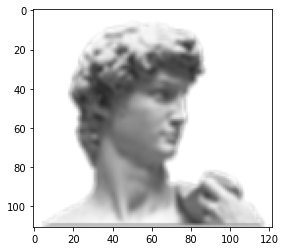

In [38]:
conv_img = convolution(padded, box_filter)
plt.imshow(conv_img)

[1 1] [112 123] 3 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


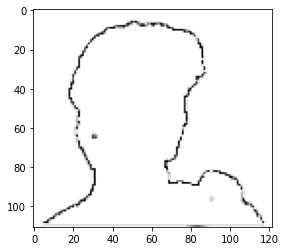

In [39]:
laplacian = np.array(
    [[1, 0, 1],
     [0, -4, 0],
     [1, 0, 1],     ])
conv_img = convolution(padded, laplacian)
plt.imshow(conv_img)

[1 1] [112 123] 3 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


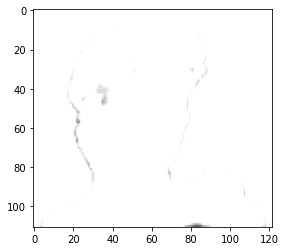

In [40]:
unknown = np.random.rand(3, 3)

conv_img = convolution(padded, unknown)
np.clip(conv_img, 0, 255)
plt.imshow(conv_img)

model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (64, 64, 3),
                       kernel_size = (3, 3), filters = 32),
    keras.layers.MaxPooling2d((2,2), strides = 2),
    keras.layers.Conv2D(kernel_size = (3, 3), padding = 'same', filters = 64),
    ...])

### LAB 9-2. CNN으로 패션 MNIST 분류를 개선하기

In [41]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있고, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [42]:
print(train_images.shape) # 학습이미지의 형태와 레이블 출력
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


In [43]:
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]

In [44]:
model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (28, 28, 1),
                       kernel_size = (3, 3), padding = 'same',
                       filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides = 2),
    keras.layers.Conv2D(kernel_size = (3, 3), padding = 'same',
                       filters = 64),
    keras.layers.MaxPooling2D((2, 2), strides = 2),
    keras.layers.Conv2D(kernel_size = (3, 3), padding = 'same',
                       filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

In [46]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
history = model.fit(train_images, train_labels,
                   epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 20s 14ms/step - loss: 0.7444 - accuracy: 0.7952 - val_loss: 0.3974 - val_accuracy: 0.8571
Epoch 2/5
1407/1407 [==============================] - 19s 14ms/step - loss: 0.3622 - accuracy: 0.8682 - val_loss: 0.3294 - val_accuracy: 0.8793
Epoch 3/5
1407/1407 [==============================] - 19s 14ms/step - loss: 0.3152 - accuracy: 0.8838 - val_loss: 0.4478 - val_accuracy: 0.8485
Epoch 4/5
1407/1407 [==============================] - 19s 14ms/step - loss: 0.3215 - accuracy: 0.8834 - val_loss: 0.3281 - val_accuracy: 0.8795
Epoch 5/5
1407/1407 [==============================] - 19s 14ms/step - loss: 0.2841 - accuracy: 0.8963 - val_loss: 0.3193 - val_accuracy: 0.8803


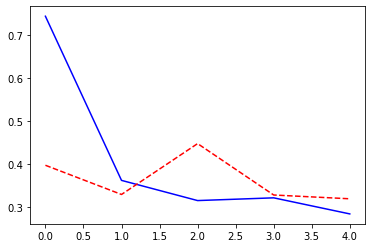

In [47]:
plt.plot(history.history['loss'], 'b-');
plt.plot(history.history['val_loss'], 'r--');

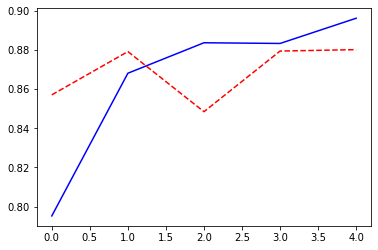

In [48]:
plt.plot(history.history['accuracy'], 'b-');
plt.plot(history.history['val_accuracy'], 'r--');

In [49]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3440 - accuracy: 0.8695 - 1s/epoch - 4ms/step
테스트 정확도: 0.8694999814033508


In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [51]:
randIdx = np.random.randint(0, 1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)

[1 5 2 6 3 3 1 1 4 9 4 3 7 7 6 8 9 9 6 1 3 4 0 0 5]


In [55]:
def plot_images(images, labels, images_per_row=5):
    n_images = len(images)
    n_rows = (n_images-1) // images_per_row + 1
    fig, ax = plt.subplots(n_rows, images_per_row, figsize = (images_per_row * 2, n_rows * 2))

    for i in range(n_rows):
        for j in range(images_per_row):
            if i * images_per_row + j >= n_images:
                break
            
    img_idx = i * images_per_row + j
    a_image = images[img_idx].reshape(28,28)
        
    if n_rows > 1:
        axis = ax[i, j]
    else:
        axis = ax[j]
            
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    label = class_names[labels[img_idx]]
    axis.set_title(label)
    axis.imshow(a_image, cmap='gray', interpolation='nearest')

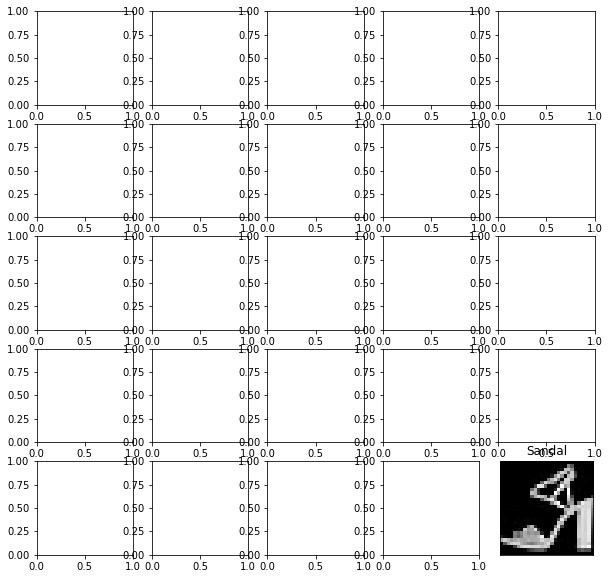

In [56]:
plot_images(images, predictions, images_per_row = 5)

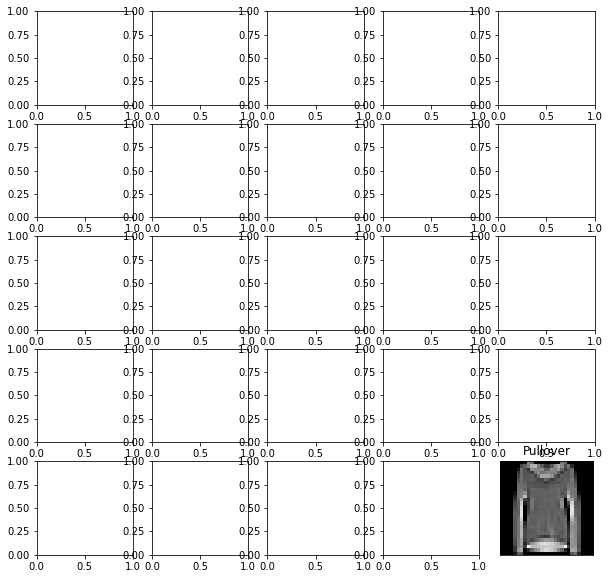

In [57]:
randIdx = np.random.randint(0, 1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
plot_images(images, predictions, images_per_row = 5)